In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

import os
from keras.preprocessing.image import array_to_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Activation,Dropout,Flatten,MaxPool2D


In [2]:
#load data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

5


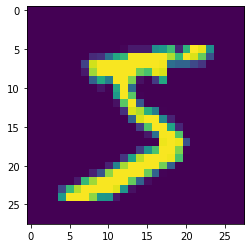

In [3]:
#Explore the  data
plt.imshow(x_train[0])
print(y_train[0])

In [4]:
# preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))



In [5]:
#normalize the data
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
#define the model
model1=Sequential([
                   Conv2D(filters=25, kernel_size=(3, 3),input_shape=(28,28,1), activation='tanh'),
                   MaxPool2D((2, 2)),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='tanh'),
                   MaxPool2D((2, 2)),
                   Flatten(),
                   Dense(units=64,activation="tanh"),
                   Dense(units=16,activation="tanh"),
                   Dense(units=10,activation='softmax')
])

In [8]:
#compile the model
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [9]:
#FIT the model
size_of_batch=32
model1.fit(x_train,y_train,batch_size=size_of_batch,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1753 - accuracy: 0.9592
Epoch 2/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0548 - accuracy: 0.9843
Epoch 3/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0411 - accuracy: 0.9884
Epoch 4/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0322 - accuracy: 0.9907
Epoch 5/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 6/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 7/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0215 - accuracy: 0.9935
Epoch 8/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 9/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 10/30
1875/1875 [==============================] - 54s 29m

In [10]:
#check the accuracy
test_loss,test_accuracy=model1.evaluate(x_test,y_test)
print(f'Test loss is {test_loss}')
print(f'Test accuracy is {test_accuracy}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0515 - accuracy: 0.9871
Test loss is 0.05152537673711777
Test accuracy is 0.9871000051498413
